In [29]:
# importing libraries and dependancies: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

data = pd.read_csv('S&TComments.csv',error_bad_lines=False
                        ,encoding='latin1'
                        
                        #, cyrillic encoding='latin1'
                       )
#pd.read_csv('commedy_comment.csv')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ismayiltahmazov/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
b'Skipping line 5: expected 1 fields, saw 5\nSkipping line 6: expected 1 fields, saw 2\nSkipping line 45: expected 1 fields, saw 2\nSkipping line 48: expected 1 fields, saw 2\nSkipping line 63: expected 1 fields, saw 2\nSkipping line 65: expected 1 fields, saw 2\nSkipping line 85: expected 1 fields, saw 2\nSkipping line 91: expected 1 fields, saw 2\nSkipping line 96: expected 1 fields, saw 2\nSkipping line 101: expected 1 fields, saw 2\nSkipping line 104: expected 1 fields, saw 2\nSkipping line 106: expected 1 fields, saw 2\nSkipping line 110: expected 1 fields, saw 2\nSkipping line 112: expected 1 fields, saw 2\nSkipping line 120: expected 1 fields, saw 2\nSkipping line 131: expected 1 fields, saw 2\nSkipping line 145: expected 1 fields, saw 2\nSkipping line 147: expected 1 fields, saw 2\nSkipping line 194: expected 1 fields, s

Here after importing the libraries I'll explore the data to the see the various datatypes and drop rows with missing values (if any)

In [30]:
data.head()

,ï»¿video_id;comment
0,0PZzqQYvPwI;Sir kindly make a video explaining...
1,0PZzqQYvPwI;Thanks a lot sir. Much needed lect...
2,0PZzqQYvPwI;Thanks sir...ððððð
3,0PZzqQYvPwI;Thanku sir
4,0PZzqQYvPwI;thank you guruji


In [22]:
data.shape

(15128, 1)

In [23]:
data = data.dropna()

In [24]:
data.shape

(15128, 1)

Since only a few rows (18) had missing data, I found it better to drop those and work on the remaining data

In [25]:
data.dtypes

video_id;comment    object
dtype: object

In [28]:
data['comment'].head()

KeyError: 'comment'

In [ ]:
# calling the function
sia = SentimentIntensityAnalyzer()

In [27]:
data['negative'] = data['comments'].apply(lambda x : sia.polarity_scores(x)['neg'])
data['neutral'] = data['comments'].apply(lambda x : sia.polarity_scores(x)['neu'])
data['positive'] = data['comments'].apply(lambda x : sia.polarity_scores(x)['pos'])
data['compound'] = data['comments'].apply(lambda x : sia.polarity_scores(x)['compound'])

KeyError: 'comments'

In [10]:
data.head()

,video_id,comments,negative,neutral,positive,compound
0,sRyslbdtT90,What's up Vagabonds! Hope you enjoy our video...,0.000,0.670,0.33,0.9402
1,sRyslbdtT90,If only flights werent so expensive,0.000,1.000,0.00,0.0000
2,sRyslbdtT90,Girlfriend: OMG lets go Cape town then Mexico ...,0.000,1.000,0.00,0.0000
3,sRyslbdtT90,"Me: Broke , we will be broke",0.583,0.417,0.00,-0.6808
4,sRyslbdtT90,Its cheap when you get there but what about fl...,0.000,1.000,0.00,0.0000


In [11]:
# Counting the positive, negative and neutral reviews : 

positive_reviews = np.sum(i > 0.4 for i in data['compound'])
neutral_reviews = np.sum(-0.4 < i < 0.4 for i in data['compound'])
negative_reviews = np.sum(i < -0.4 for i in data['compound'])
n = len(data['compound'])

/Users/ismayiltahmazov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ismayiltahmazov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.
/Users/ismayiltahmazov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


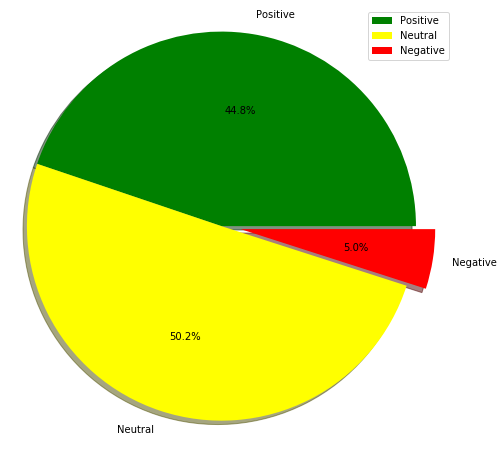

In [12]:

labels = 'Positive', 'Neutral', 'Negative'
sizes = [(positive_reviews * 100)/n, (neutral_reviews * 100)/n, (negative_reviews * 100)/n]
colors = ['green', 'yellow', 'red']
explode = (0, 0, 0.1)  # explode 1st slice

# Plot
plt.figure(figsize =(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

plt.axis('equal') 
plt.legend()
plt.show()

In [13]:
from wordcloud import WordCloud, STOPWORDS

In [14]:
stopwords = set(STOPWORDS)
text = " ".join(i for i in data['comments'])

In [15]:
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 750821 words in the combination of all reviews.


In [16]:
# Generating a wordcloud image: 
wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=100).generate(text)

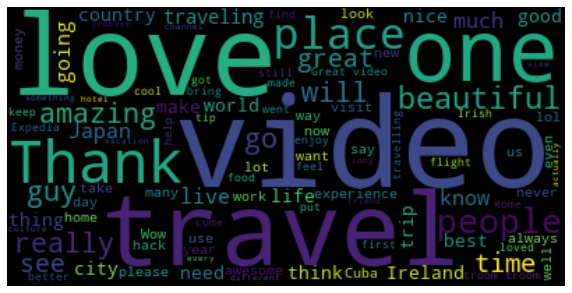

In [17]:
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()